In [144]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

red = '/Users/shenchingfeng/Documents/1112/機器學習/Homework 2/red.csv'
white = '/Users/shenchingfeng/Documents/1112/機器學習/Homework 2/white.csv'

red = pd.read_csv(red)
white = pd.read_csv(white)

red.drop(['Unnamed: 0', 'wine'], axis = 1, inplace = True)
white.drop(['Unnamed: 0', 'wine'], axis = 1, inplace = True)

In [145]:
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [146]:
from scipy import stats

select_col = red.drop(['quality'], axis = 1).columns

for i in select_col:
    red[i], lambda_value = stats.yeojohnson(red[i])
for i in select_col:
    white[i], lambda_value = stats.yeojohnson(white[i])

result_red = pd.DataFrame(columns = ["model", "accuracy"])
result_white = pd.DataFrame(columns = ["model", "accuracy"])

In [147]:
import numpy as np

for i in select_col:
    print(f"{i} Skewness:", round(red[i].skew(), 2))
    print(f"{i} Kurtosis:", round(red[i].kurt(), 2))
    print("=======================")

print("=======================")

for i in select_col:
    print(f"{i} Skewness:", round(white[i].skew(), 2))
    print(f"{i} Kurtosis:", round(white[i].kurt(), 2))
    print("=======================")

fixed acidity Skewness: 0.0
fixed acidity Kurtosis: 0.04
volatile acidity Skewness: 0.0
volatile acidity Kurtosis: -0.13
citric acid Skewness: 0.02
citric acid Kurtosis: -1.08
residual sugar Skewness: -0.02
residual sugar Kurtosis: 0.94
chlorides Skewness: -0.15
chlorides Kurtosis: 3.3
free sulfur dioxide Skewness: -0.01
free sulfur dioxide Kurtosis: -0.67
total sulfur dioxide Skewness: -0.0
total sulfur dioxide Kurtosis: -0.69
density Skewness: 0.0
density Kurtosis: 0
pH Skewness: -0.0
pH Kurtosis: 0.66
sulphates Skewness: 0.01
sulphates Kurtosis: 0.08
alcohol Skewness: 0.11
alcohol Kurtosis: -0.93
fixed acidity Skewness: -0.01
fixed acidity Kurtosis: 0.91
volatile acidity Skewness: 0.01
volatile acidity Kurtosis: -0.05
citric acid Skewness: -0.07
citric acid Kurtosis: 2.14
residual sugar Skewness: 0.0
residual sugar Kurtosis: -1.37
chlorides Skewness: -0.07
chlorides Kurtosis: 1.09
free sulfur dioxide Skewness: 0.03
free sulfur dioxide Kurtosis: 0.74
total sulfur dioxide Skewness: 0.

In [148]:
red.quality.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

In [149]:
white.quality.value_counts().sort_index()

3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64

In [150]:
x_train_red, x_test_red, y_train_red, y_test_red = train_test_split(red.drop(['quality'], axis = 1), red.quality, shuffle = True, random_state = 42)

scl = StandardScaler()
x_train_red = scl.fit_transform(x_train_red)
x_test_red = scl.transform(x_test_red)

In [173]:
x_train_white, x_test_white, y_train_white, y_test_white = train_test_split(white.drop(['quality'], axis = 1), white.quality, shuffle = True, random_state = 42)

scl = StandardScaler()
x_train_white = scl.fit_transform(x_train_white)
x_test_white = scl.transform(x_test_white)

[11/11] features ████████████████████ Time elapsed: 0 seconds

Text(0.5, 1.0, 'Feature importance of Red Wine')

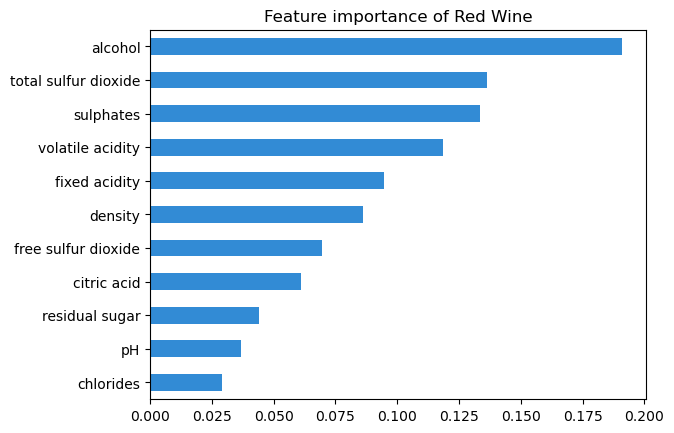

In [152]:
from sklearn.linear_model import LogisticRegression
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel
import matplotlib.pyplot as plt

lr = LogisticRegression()
model = lr.fit(x_train_red, y_train_red)
y_pred_red = model.predict(x_test_red)

interpreter = Interpretation(
    x_test_red, feature_names = red.drop('quality', axis = 1).columns
)

pyint_model = InMemoryModel(
            lr.predict_proba,
            examples = x_train_red
        )

plots = interpreter.feature_importance.plot_feature_importance(pyint_model, ascending = False, progressbar = True)
plt.title('Feature importance of Red Wine')

[11/11] features ████████████████████ Time elapsed: 0 seconds

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Text(0.5, 1.0, 'Feature importance of White Wine')

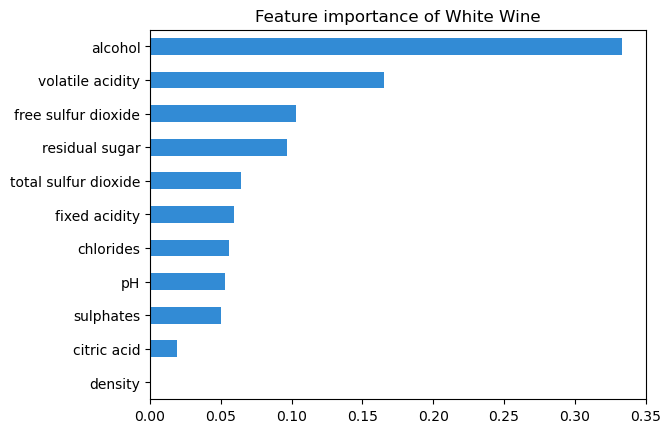

In [153]:
lr = LogisticRegression()
model = lr.fit(x_train_white, y_train_white)
y_pred_white = model.predict(x_test_white)

interpreter = Interpretation(
    x_test_white, feature_names = white.drop('quality', axis = 1).columns
)

pyint_model = InMemoryModel(
            lr.predict_proba,
            examples = x_train_white
        )

plots = interpreter.feature_importance.plot_feature_importance(pyint_model, ascending = False, progressbar = True)
plt.title('Feature importance of White Wine')

In [154]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

acu = metrics.accuracy_score(y_test_red, y_pred_red)
pre_class, r_class, f_class, sup = metrics.precision_recall_fscore_support(y_test_red, y_pred_red, average = 'weighted')

print("Acurracy: ", round(acu * 100, 4), '%')
print('Precision:', round(pre_class * 100, 4), '%')
print('Recall:', round(r_class * 100, 4), '%')
print('f1:', round(f_class * 100, 4), '%')

labels = [3, 4, 5, 6, 7, 8]
cm = metrics.confusion_matrix(y_test_red, y_pred_red, labels = labels)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize confusion matrix
cm_norm = pd.DataFrame(cm_norm, index = labels, columns = labels)
cm_norm

Acurracy:  57.25 %
Precision: 53.7229 %
Recall: 57.25 %
f1: 54.9786 %


/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



,3,4,5,6,7,8
3,0.0,0.0,0.000000,1.000000,0.000000,0.0
4,0.0,0.0,0.692308,0.307692,0.000000,0.0
5,0.0,0.0,0.731707,0.262195,0.006098,0.0
6,0.0,0.0,0.366864,0.568047,0.065089,0.0
7,0.0,0.0,0.041667,0.687500,0.270833,0.0
8,0.0,0.0,0.000000,0.400000,0.600000,0.0


In [155]:
import plotly.graph_objects as go

labels = list(range(3, 9))

fig = go.Figure(
    data = go.Heatmap(
        z = cm_norm,
        x = labels,
        y = labels,
        zmin = 0,
        zmax = 1,
        colorscale = [
            [0, 'blue'],
            [1, 'red']
        ],
        text = cm_norm.values.round(2)
    ),
    layout = go.Layout(
        title = {
            'text': 'Confusion matrix before SMOTE',
            'font': {'size': 32, 'family': "Gulliver"},
            'x': 0.5
        },
        yaxis_title = {
            'font': {'size': 20},
            'text': 'Actual'
        },
        xaxis_title = {
            'font': {'size': 20},
            'text': 'Predicted'
        },
        width = 600,
        height = 600
    )
)

fig.update_xaxes(tickfont=dict(size = 16))
fig.update_yaxes(tickfont=dict(size = 16))

fig.show()

## Upsample By SMOTE

In [183]:
smt = SMOTE(sampling_strategy = 'auto')

X = red.drop('quality', axis = 1)
y = red.quality
X, y = smt.fit_resample(X, y)

x_train_red, x_test_red, y_train_red, y_test_red = train_test_split(X, y, shuffle = True, random_state = 42)

In [186]:
smt = SMOTE(sampling_strategy = 'auto', k_neighbors = 4)

X = white.drop('quality', axis = 1)
y = white.quality
X, y = smt.fit_resample(X, y)

x_train_white, x_test_white, y_train_white, y_test_white = train_test_split(X, y, shuffle = True, random_state = 42)

[11/11] features ████████████████████ Time elapsed: 0 seconds

Text(0.5, 1.0, 'Feature importance of Red Wine')

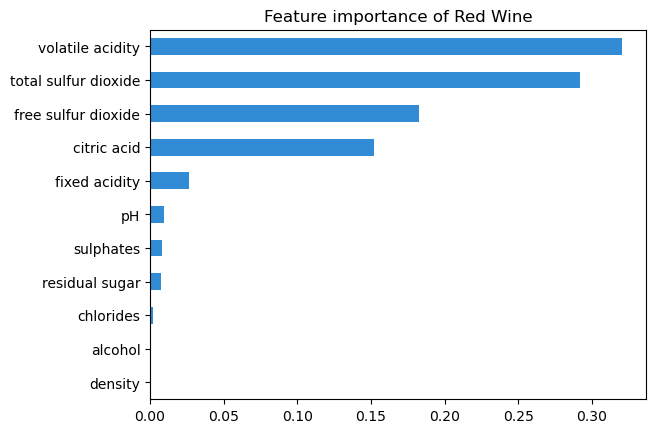

In [197]:
lr = LogisticRegression(max_iter = int(1e7))
model = lr.fit(x_train_red, y_train_red)
y_pred_red = model.predict(x_test_red)

interpreter = Interpretation(
    x_test_red, feature_names = red.drop('quality', axis = 1).columns
)

pyint_model = InMemoryModel(
            lr.predict_proba,
            examples = x_train_red
        )

plots = interpreter.feature_importance.plot_feature_importance(pyint_model, ascending = False, progressbar = True)
plt.title('Feature importance of Red Wine')

[11/11] features ████████████████████ Time elapsed: 0 seconds

Text(0.5, 1.0, 'Feature importance of White Wine')

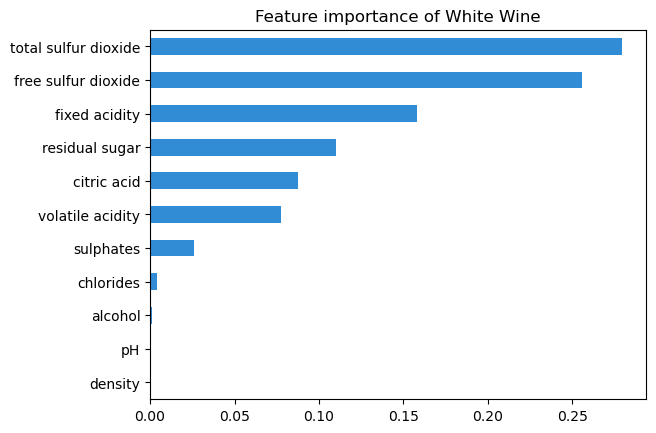

In [191]:
lr = LogisticRegression(max_iter = int(1e7))
model = lr.fit(x_train_white, y_train_white)
y_pred_white = model.predict(x_test_white)

interpreter = Interpretation(
    x_test_white, feature_names = white.drop('quality', axis = 1).columns
)

pyint_model = InMemoryModel(
            lr.predict_proba,
            examples = x_train_white
        )

plots = interpreter.feature_importance.plot_feature_importance(pyint_model, ascending = False, progressbar = True)
plt.title('Feature importance of White Wine')

In [198]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

acu = metrics.accuracy_score(y_test_red, y_pred_red)
pre_class, r_class, f_class, sup = metrics.precision_recall_fscore_support(y_test_red, y_pred_red, average = 'weighted')

print("Acurracy: ", round(acu * 100, 4), '%')
print('Precision:', round(pre_class * 100, 4), '%')
print('Recall:', round(r_class * 100, 4), '%')
print('f1:', round(f_class * 100, 4), '%')

labels = list(range(3, 9))
cm = metrics.confusion_matrix(y_test_red, y_pred_red, labels = labels)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize confusion matrix
cm_norm = pd.DataFrame(cm_norm, index = labels, columns = labels)
cm_norm

Acurracy:  43.5421 %
Precision: 43.2529 %
Recall: 43.5421 %
f1: 41.7075 %


,3,4,5,6,7,8
3,0.769697,0.072727,0.072727,0.012121,0.066667,0.006061
4,0.327273,0.303030,0.236364,0.018182,0.072727,0.042424
5,0.086486,0.210811,0.454054,0.075676,0.086486,0.086486
6,0.113990,0.165803,0.196891,0.165803,0.207254,0.150259
7,0.013605,0.081633,0.102041,0.047619,0.503401,0.251701
8,0.029940,0.000000,0.077844,0.083832,0.341317,0.467066


In [199]:
import plotly.graph_objects as go

fig = go.Figure(
    data = go.Heatmap(
        z = cm_norm,
        x = labels,
        y = labels,
        zmin = 0,
        zmax = 1,
        colorscale = [
            [0, 'blue'],
            [1, 'red']
        ],
        text = cm_norm.values.round(2)
    ),
    layout = go.Layout(
        title = {
            'text': 'Confusion matrix of Red Wine',
            'font': {'size': 32, 'family': "Gulliver"},
            'x': 0.5
        },
        yaxis_title = {
            'font': {'size': 20},
            'text': 'Actual'
        },
        xaxis_title = {
            'font': {'size': 20},
            'text': 'Predicted'
        },
        width = 600,
        height = 600
    )
)

fig.update_xaxes(tickfont=dict(size = 16))
fig.update_yaxes(tickfont=dict(size = 16))

fig.show()

In [194]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

acu = metrics.accuracy_score(y_test_white, y_pred_white)
pre_class, r_class, f_class, sup = metrics.precision_recall_fscore_support(y_test_white, y_pred_white, average = 'weighted')

print("Acurracy: ", round(acu * 100, 4), '%')
print('Precision:', round(pre_class * 100, 4), '%')
print('Recall:', round(r_class * 100, 4), '%')
print('f1:', round(f_class * 100, 4), '%')

labels = list(range(3, 10))
cm = metrics.confusion_matrix(y_test_white, y_pred_white, labels = labels)
cm_norm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
cm_norm = pd.DataFrame(cm_norm, index = labels, columns = labels)
cm_norm

Acurracy:  36.8339 %
Precision: 33.8475 %
Recall: 36.8339 %
f1: 33.792 %


,3,4,5,6,7,8,9
3,0.371429,0.165714,0.127619,0.015238,0.015238,0.055238,0.249524
4,0.100917,0.559633,0.122936,0.023853,0.020183,0.044037,0.128440
5,0.110333,0.222417,0.262697,0.087566,0.049037,0.127846,0.140105
6,0.113240,0.104530,0.158537,0.076655,0.163763,0.198606,0.184669
7,0.084249,0.084249,0.120879,0.064103,0.208791,0.232601,0.205128
8,0.063406,0.067029,0.083333,0.117754,0.201087,0.306159,0.161232
9,0.170412,0.005618,0.000000,0.000000,0.000000,0.000000,0.823970


In [195]:
import plotly.graph_objects as go

fig = go.Figure(
    data = go.Heatmap(
        z = cm_norm,
        x = labels,
        y = labels,
        zmin = 0,
        zmax = 1,
        colorscale = [
            [0, 'blue'],
            [1, 'red']
        ],
        text = cm_norm.values.round(2)
    ),
    layout = go.Layout(
        title = {
            'text': 'Confusion matrix of White Wine',
            'font': {'size': 32, 'family': "Gulliver"},
            'x': 0.5
        },
        yaxis_title = {
            'font': {'size': 20},
            'text': 'Actual'
        },
        xaxis_title = {
            'font': {'size': 20},
            'text': 'Predicted'
        },
        width = 600,
        height = 600
    )
)

fig.update_xaxes(tickfont=dict(size = 16))
fig.update_yaxes(tickfont=dict(size = 16))

fig.show()

/opt/anaconda3/lib/python3.9/site-packages/mlxtend/plotting/decision_regions.py:300: UserWarning:

You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.



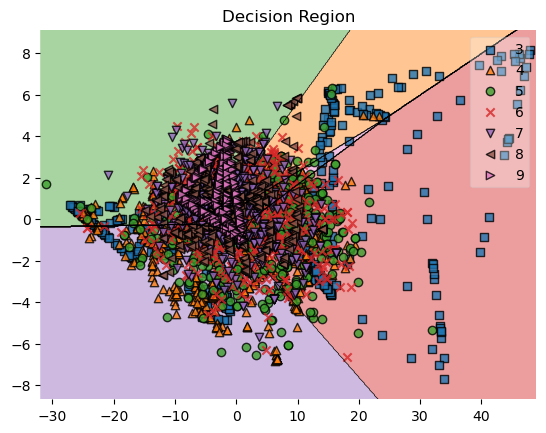

In [200]:
from mlxtend.plotting import plot_learning_curves, plot_decision_regions

pca = PCA(n_components = 2)
x_train_pca = pca.fit_transform(x_train_white)
x_test_pca = pca.transform(x_test_white)

plot_decision_regions(x_test_pca, y_test_white.values, clf = model.fit(x_train_pca, y_train_white.values))
plt.title('Decision Region')
plt.show()

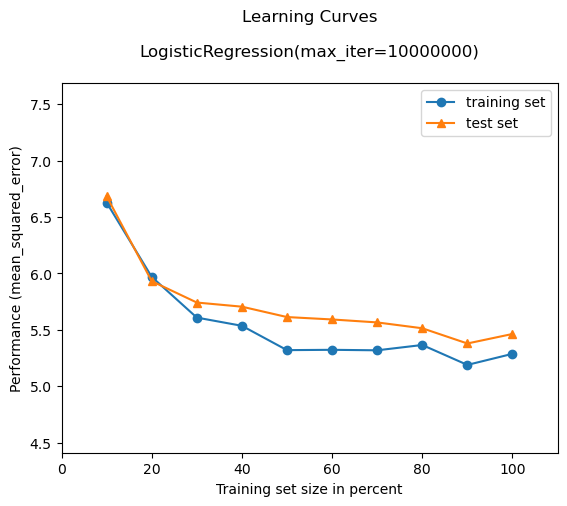

In [201]:
plot_learning_curves(x_train_white, y_train_white, x_test_white, y_test_white, model, scoring = 'mean_squared_error')
plt.show()